![example](images/microsoft-logo.jpeg)

# MS Movie Analysis

**Authors:** Filippe Fontenele
***

## Overview

Microsoft wants to venture into the movie business but has no knowledge about it. Through data analysis, we will uncovered healhy sugestions that will lead the company into a succesful start in a competitive field.

## Business Problem

Microsoft wants to create a movie studio to compete in a new business front.

We are going to consider the following factors to lead them to a profitable future in this business

***
Questions to consider:
* Does the general public rating affect profitability?
* Does a big production budget leads to a greater profit?
* Is there a genre or genres that is more profitable and successful?
* Having a good insight into how the general public perceives a movie, how to approach the initial investment and the genres should give Microsoft a starting point.
***

## Data Understanding

***
We used 2 datasets for this project:
* IMDb: online database of information related to films, television series, podcasts, home videos, video games, and streaming content online.
* The Numbers: provides detailed movie financial analysis, including box office, DVD and Blu-ray sales reports, and release schedules.
***

In [41]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

In [60]:
# basics dataframe will be used as a guide linking the others since it is the only
# one that has genres and lenght of movies
basic = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
# first 2 rows
# ratings dataframe will give us an insight into public opinion
rating = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
# roi dataframe will be important to give us an insight on movies with successfull returns of investment
profit = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [3]:
# general shape of the dataset
basics.shape

(146144, 6)

In [61]:
# general basics info of the dataset
basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [62]:
# general shape of the dataset
rating.shape

(73856, 3)

In [63]:
# general ratings dataset info
# Note: rows without empty values
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [64]:
# general shape of roidf dataset
profit.shape

(5782, 6)

In [65]:
# general info of roidf the dataset
profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation

### Data Cleaning

For the profit data, I converted the columns with dollar signs to numeric values and dropped unecessary columns.
We also renamed columns to match other datasets to merge and converted the date to year only.

In [66]:
# dropping column 'domestic_gross'
profit = profit.drop(columns = 'domestic_gross')
profit

,id,release_date,movie,production_budget,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0
5778,79,"Apr 2, 1999",Following,"$6,000","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0


In [67]:
# Converting 'production_budget' and 'worldwide_gross' columns to numeric values
profit['production_budget'] = profit['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
profit['worldwide_gross'] = profit['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

In [68]:
# for this analysis, we don't need the full release date
# we want to convert the release date to year only format
# converting 'release_date' column to datetime format
profit['release_date'] = pd.to_datetime(profit['release_date'])

# extracting the year from 'release_date' column
profit['release_date'] = profit['release_date'].dt.year

# changing column name movie to primary_title
profit.rename(columns={'movie': 'primary_title'}, inplace=True)

### Merging Datasets

In [70]:
# merging basics and ratings datasets
merge = pd.merge(rating, basic, on = 'tconst')

In [71]:
# checking first rows
merge.head(3)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama


In [72]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [73]:
# merging profit dataset to merge
profit_merge = pd.merge(merge_1, profit, on = 'primary_title', how = 'outer')

In [74]:
profit_merge.head(3)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,worldwide_gross
0,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN,NaN,NaN
1,tt10384606,8.9,559.0,Borderless,Borderless,2019.0,87.0,Documentary,NaN,NaN,NaN,NaN
2,tt4131210,7.1,210.0,Borderless,Bedone marz,2014.0,102.0,"Drama,War",NaN,NaN,NaN,NaN


In [75]:
profit_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77577 entries, 0 to 77576
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             73979 non-null  object 
 1   averagerating      73979 non-null  float64
 2   numvotes           73979 non-null  float64
 3   primary_title      77577 non-null  object 
 4   original_title     73979 non-null  object 
 5   start_year         73979 non-null  float64
 6   runtime_minutes    66348 non-null  float64
 7   genres             73174 non-null  object 
 8   id                 6473 non-null   float64
 9   release_date       6473 non-null   float64
 10  production_budget  6473 non-null   float64
 11  worldwide_gross    6473 non-null   float64
dtypes: float64(8), object(4)
memory usage: 7.7+ MB


In [77]:
# dropping more unnecessary columns
columns_to_drop = ['original_title', 'id', 'release_date']
profit_short = profit_merge.drop(columns=columns_to_drop)
profit_short.head(3)

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,NaN,NaN
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",NaN,NaN


In [78]:
profit_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77577 entries, 0 to 77576
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             73979 non-null  object 
 1   averagerating      73979 non-null  float64
 2   numvotes           73979 non-null  float64
 3   primary_title      77577 non-null  object 
 4   start_year         73979 non-null  float64
 5   runtime_minutes    66348 non-null  float64
 6   genres             73174 non-null  object 
 7   production_budget  6473 non-null   float64
 8   worldwide_gross    6473 non-null   float64
dtypes: float64(6), object(3)
memory usage: 5.9+ MB


In [79]:
# creating a variable to find current year
currentyear = pd.Timestamp.now().year
currentyear

2024

In [80]:
# using above variable to limit dataframe to last 10 years
# this is the final merge that will be used
finaldf = profit_short[roi_short['start_year'] >= current_year - 10]
finaldf.head(3)

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,NaN,NaN
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",NaN,NaN


We will find and fill NaN values in this new dataset

In [81]:
# finding NaN values in common
finaldf.isna().sum()

tconst                   0
averagerating            0
numvotes                 0
primary_title            0
start_year               0
runtime_minutes       4698
genres                 436
production_budget    42498
worldwide_gross      42498
dtype: int64

In [82]:
# eliminating NaN values 
finaldf.dropna(subset=['genres'])

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,NaN,NaN
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",NaN,NaN
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",70000000.0,58953319.0
8,tt3096900,6.5,13.0,The Hammer,2015.0,75.0,"Action,Adventure,Documentary",850000.0,442638.0
...,...,...,...,...,...,...,...,...,...
73974,tt9768966,8.6,27.0,Plugged in,2019.0,53.0,Documentary,NaN,NaN
73975,tt9783738,7.4,7.0,Bangkok Dark Tales,2019.0,NaN,Horror,NaN,NaN
73976,tt9805820,8.1,25.0,Caisa,2018.0,84.0,Documentary,NaN,NaN
73977,tt9844256,7.5,24.0,Code Geass: Lelouch of the Rebellion - Glorifi...,2018.0,120.0,"Action,Animation,Sci-Fi",NaN,NaN


In [83]:
# checking for duplicates in 'primary_title'
duplicates = finaldf[merge_final.duplicated(subset = ['primary_title'])]
# dropping duplicates to reduce redudancy
finaldf.drop_duplicates(subset='primary_title', keep = "first")

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,NaN,NaN
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",70000000.0,58953319.0
8,tt3096900,6.5,13.0,The Hammer,2015.0,75.0,"Action,Adventure,Documentary",850000.0,442638.0
11,tt1161457,4.2,148.0,Vanquisher,2016.0,90.0,"Action,Adventure,Sci-Fi",NaN,NaN
...,...,...,...,...,...,...,...,...,...
73974,tt9768966,8.6,27.0,Plugged in,2019.0,53.0,Documentary,NaN,NaN
73975,tt9783738,7.4,7.0,Bangkok Dark Tales,2019.0,NaN,Horror,NaN,NaN
73976,tt9805820,8.1,25.0,Caisa,2018.0,84.0,Documentary,NaN,NaN
73977,tt9844256,7.5,24.0,Code Geass: Lelouch of the Rebellion - Glorifi...,2018.0,120.0,"Action,Animation,Sci-Fi",NaN,NaN


In [85]:
# filling NaN values in 'runtime_minutes', 'production_budget' and 'worldwide_gross'
# using median
median_runtime = finaldf['runtime_minutes'].median()
median_runtime

92.0

In [86]:
# using median variable created to fill NaN values
merge_final['runtime_minutes'].fillna(median_runtime, inplace = True)

In [87]:
median_budget = finaldf['production_budget'].median()
median_budget

18000000.0

In [88]:
# using median variable created to fill NaN values
finaldf['production_budget'].fillna(median_budget, inplace = True)

In [89]:
median_gross = finaldf['worldwide_gross'].median()
median_gross

31009205.5

In [90]:
# using median variables created to fill NaN values
finaldf['worldwide_gross'].fillna(median_gross, inplace = True)

In [91]:
# checking data after filling NaN values
finaldf.head(3)

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,18000000.0,31009205.5
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,18000000.0,31009205.5
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",18000000.0,31009205.5


In [92]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44082 entries, 0 to 73978
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             44082 non-null  object 
 1   averagerating      44082 non-null  float64
 2   numvotes           44082 non-null  float64
 3   primary_title      44082 non-null  object 
 4   start_year         44082 non-null  float64
 5   runtime_minutes    39384 non-null  float64
 6   genres             43646 non-null  object 
 7   production_budget  44082 non-null  float64
 8   worldwide_gross    44082 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


Creating two new columns for analysis

In [93]:
# creating a worldwide profit column
finaldf['world_wide_profit'] = (finaldf['worldwide_gross'] - finaldf['production_budget'])
finaldf.head()

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,18000000.0,31009205.5,13009205.5
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,18000000.0,31009205.5,13009205.5
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",18000000.0,31009205.5,13009205.5
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",70000000.0,58953319.0,-11046681.0
8,tt3096900,6.5,13.0,The Hammer,2015.0,75.0,"Action,Adventure,Documentary",850000.0,442638.0,-407362.0


In [94]:
# creating a ROI column to analise return of investment
finaldf['ROI'] = (finaldf['world_wide_profit']  / finaldf['production_budget']) * 100
finaldf.head()

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit,ROI
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,18000000.0,31009205.5,13009205.5,72.273364
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,18000000.0,31009205.5,13009205.5,72.273364
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",18000000.0,31009205.5,13009205.5,72.273364
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",70000000.0,58953319.0,-11046681.0,-15.780973
8,tt3096900,6.5,13.0,The Hammer,2015.0,75.0,"Action,Adventure,Documentary",850000.0,442638.0,-407362.0,-47.924941


In [129]:
finaldf.describe()

,averagerating,numvotes,start_year,runtime_minutes,production_budget,worldwide_gross,world_wide_profit,ROI
count,44082.000000,4.408200e+04,44082.000000,39384.000000,4.408200e+04,4.408200e+04,4.408200e+04,44082.000000
mean,6.365684,3.002605e+03,2016.114786,94.683222,1.858624e+07,3.368271e+07,1.509648e+07,81.855020
std,1.495631,2.558932e+04,1.506421,25.368289,9.475421e+06,4.111795e+07,3.408407e+07,322.138794
min,1.000000,5.000000e+00,2014.000000,3.000000,7.000000e+03,0.000000e+00,-2.002376e+08,-100.000000
25%,5.500000,1.400000e+01,2015.000000,82.000000,1.800000e+07,3.100921e+07,1.300921e+07,72.273364
50%,6.500000,5.000000e+01,2016.000000,92.000000,1.800000e+07,3.100921e+07,1.300921e+07,72.273364
75%,7.400000,2.770000e+02,2017.000000,105.000000,1.800000e+07,3.100921e+07,1.300921e+07,72.273364
max,10.000000,1.299334e+06,2019.000000,1100.000000,3.500000e+08,2.048134e+09,1.748134e+09,41556.474000


In [103]:
# sorting first popular movies by rating and checking data
# filtering only movies with rating above 8
# when number of votes is over 50000
critically_aclaimed = finaldf[(finaldf['averagerating'] > 8) &(finaldf['numvotes'] > 50000)].sort_values(by='averagerating', ascending=False)
critically_aclaimed.head(3)

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit,ROI
10770,tt5813916,9.3,100568.0,The Mountain II,2016.0,135.0,"Action,Drama,War",18000000.0,31009205.5,13009205.5,72.273364
61003,tt4154796,8.8,441135.0,Avengers: Endgame,2019.0,181.0,"Action,Adventure,Sci-Fi",18000000.0,31009205.5,13009205.5,72.273364
26995,tt0816692,8.6,1299334.0,Interstellar,2014.0,169.0,"Adventure,Drama,Sci-Fi",165000000.0,666379375.0,501379375.0,303.866288


In [104]:
# now we want to check movies that were profitable but not necessarily a success among critics
most_profitable = finaldf[(finaldf['averagerating'] < 8) & (finaldf['numvotes'] > 50000)].sort_values(by='averagerating', ascending=False)
most_profitable.head(3)

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit,ROI
53665,tt3553976,7.9,159329.0,Captain Fantastic,2016.0,118.0,"Comedy,Drama",18000000.0,31009205.5,13009205.5,72.273364
61634,tt1065073,7.9,315584.0,Boyhood,2014.0,165.0,Drama,4000000.0,57273049.0,53273049.0,1331.826225
19023,tt1398426,7.9,165307.0,Straight Outta Compton,2015.0,147.0,"Biography,Drama,History",28000000.0,202182981.0,174182981.0,622.082075


In [182]:
# filtering for data analysis
success_filter = finaldf.loc[(finaldf['ROI'] > 80) & (finaldf['world_wide_profit'] > 10000000) & (finaldf['averagerating'] >= 8) & (finaldf['numvotes'] > 30000)]
success_filter

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit,ROI
216,tt1663202,8.0,621193.0,The Revenant,2015.0,156.0,"Action,Adventure,Biography",135000000.0,5.329383e+08,3.979383e+08,294.769113
3677,tt1392190,8.1,780910.0,Mad Max: Fury Road,2015.0,120.0,"Action,Adventure,Sci-Fi",150000000.0,3.700980e+08,2.200980e+08,146.732013
7130,tt1877832,8.0,620079.0,X-Men: Days of Future Past,2014.0,132.0,"Action,Adventure,Sci-Fi",200000000.0,7.478628e+08,5.478628e+08,273.931388
8028,tt6966692,8.3,204972.0,Green Book,2018.0,130.0,"Biography,Comedy,Drama",23000000.0,3.220344e+08,2.990344e+08,1300.149735
10248,tt3863552,8.0,63747.0,Bajrangi Bhaijaan,2015.0,163.0,"Action,Comedy,Drama",13000000.0,1.217783e+08,1.087783e+08,836.756515
14618,tt3741834,8.1,181601.0,Lion,2016.0,118.0,"Biography,Drama",12000000.0,1.495707e+08,1.375707e+08,1146.422667
15994,tt3612616,8.1,43020.0,Mommy,2014.0,139.0,Drama,4900000.0,1.753600e+07,1.263600e+07,257.877633
19817,tt5027774,8.2,344047.0,"Three Billboards Outside Ebbing, Missouri",2017.0,115.0,"Crime,Drama",12000000.0,1.601919e+08,1.481919e+08,1234.932625
26995,tt0816692,8.6,1299334.0,Interstellar,2014.0,169.0,"Adventure,Drama,Sci-Fi",165000000.0,6.663794e+08,5.013794e+08,303.866288
27876,tt2015381,8.1,948394.0,Guardians of the Galaxy,2014.0,121.0,"Action,Adventure,Comedy",170000000.0,7.708675e+08,6.008675e+08,353.451480


In [183]:
# just filtering for analysis (might not use)
success_group = success_filter.groupby(['primary_title', 'averagerating'])
success_group.sum().sort_values(by = 'ROI', ascending = False)

,,numvotes,start_year,runtime_minutes,production_budget,worldwide_gross,world_wide_profit,ROI
primary_title,averagerating,,,,,,,
Dangal,8.5,123638.0,2016.0,161.0,9500000.0,2.946546e+08,2.851546e+08,3001.627558
La La Land,8.0,436070.0,2016.0,128.0,20000000.0,4.263512e+08,4.063512e+08,2031.755815
Bohemian Rhapsody,8.0,345466.0,2018.0,134.0,55000000.0,8.949853e+08,8.399853e+08,1527.246076
Wonder,8.0,111632.0,2017.0,113.0,20000000.0,3.046047e+08,2.846047e+08,1423.023560
The Imitation Game,8.0,620834.0,2014.0,114.0,15000000.0,2.277405e+08,2.127405e+08,1418.269753
Green Book,8.3,204972.0,2018.0,130.0,23000000.0,3.220344e+08,2.990344e+08,1300.149735
Deadpool,8.0,820847.0,2016.0,108.0,58000000.0,8.010256e+08,7.430256e+08,1281.078609
"Three Billboards Outside Ebbing, Missouri",8.2,344047.0,2017.0,115.0,12000000.0,1.601919e+08,1.481919e+08,1234.932625
Lion,8.1,181601.0,2016.0,118.0,12000000.0,1.495707e+08,1.375707e+08,1146.422667


In [157]:
success_group

## Data Visualization

Using the merged datas, we visualize our finds and reach better outcomes

In [99]:
# start analysis with graphics
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

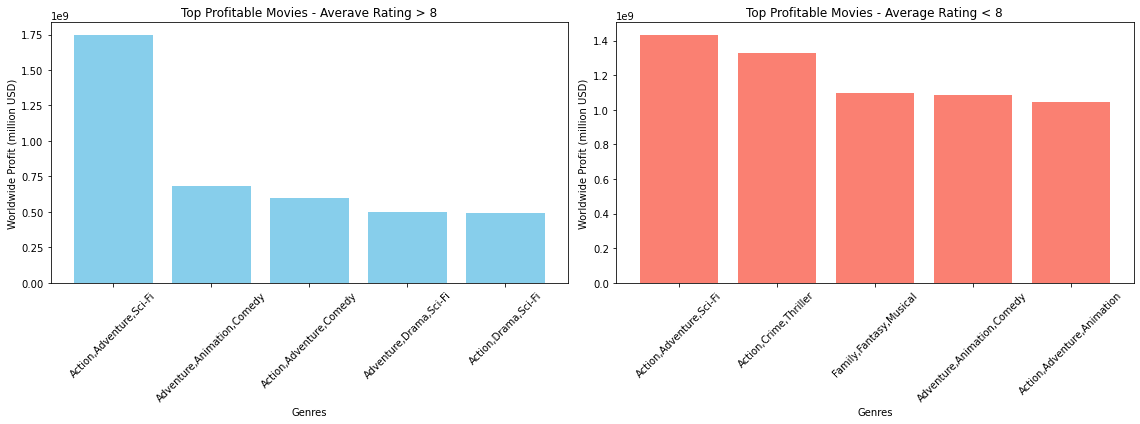

In [235]:
# Data for the first bar chart (top_profit_movies from critically acclaimed)
critically_acclaimed_graph = critically_aclaimed.nlargest(6, 'world_wide_profit')

# Data for the second bar chart (top_profit_movies from most profitable)
most_profitable_graph = most_profitable.nlargest(8, 'world_wide_profit')

# Create subplots with a shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for the first subplot
ax1.bar(critically_acclaimed_graph['genres'], critically_acclaimed_graph['world_wide_profit'], color='skyblue')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Worldwide Profit (million USD)')
ax1.set_title('Top Profitable Movies - Averave Rating > 8')
ax1.tick_params(axis='x', rotation=45)

# Plot for the second subplot
ax2.bar(most_profitable_graph['genres'], most_profitable_graph['world_wide_profit'], color='salmon')
ax2.set_xlabel('Genres')
ax2.set_ylabel('Worldwide Profit (million USD)')
ax2.set_title('Top Profitable Movies - Average Rating < 8')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In this graph, we used the same number of votes per movie (5000) but on the left you have movies with ratings > 8 and on the right ratings < 8.
By looking at the graph, we can see that Action, Adventure, Sci-Fi are popular in both sides.
The only other genre that overlaps is Adventure, Animation, Comedy.

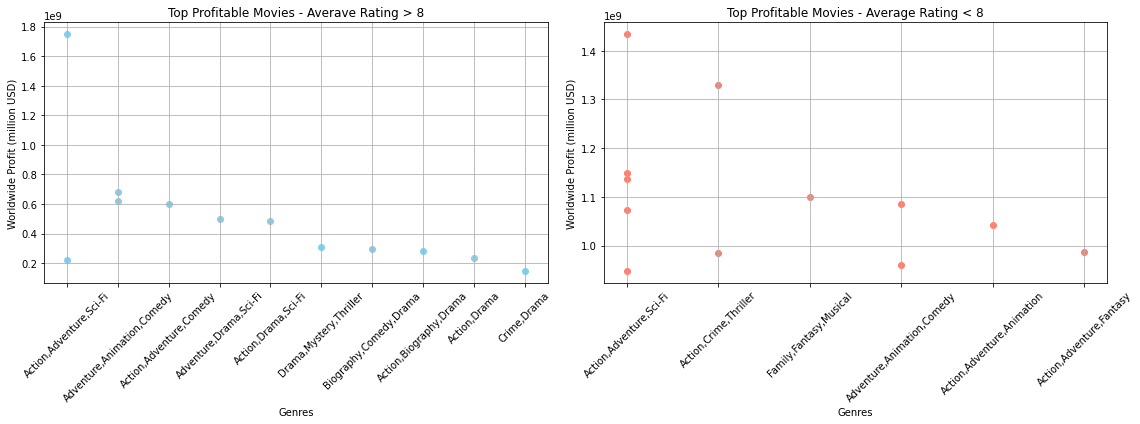

In [176]:
# Data for the first bar chart (top_profit_movies from critically acclaimed)
critically_acclaimed_graph = critically_aclaimed.nlargest(12, 'world_wide_profit')

# Data for the second bar chart (top_profit_movies from most profitable)
most_profitable_graph = most_profitable.nlargest(12, 'world_wide_profit')

# Create subplots with a shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for the first subplot
ax1.scatter(critically_acclaimed_graph['genres'], critically_acclaimed_graph['world_wide_profit'], color='skyblue')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Worldwide Profit (million USD)')
ax1.set_title('Top Profitable Movies - Averave Rating > 8')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# Plot for the second subplot
ax2.scatter(most_profitable_graph['genres'], most_profitable_graph['world_wide_profit'], color='salmon')
ax2.set_xlabel('Genres')
ax2.set_ylabel('Worldwide Profit (million USD)')
ax2.set_title('Top Profitable Movies - Average Rating < 8')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The cluster in the lower left corner of the scatter plot, where movies have low worldwide gross profit relative to their production budget, suggests a weak correlation between production budget and profit. 
This means that in this specific dataset, there is a tendency for some movies to have high budgets but not necessarily translate that investment into high profits.

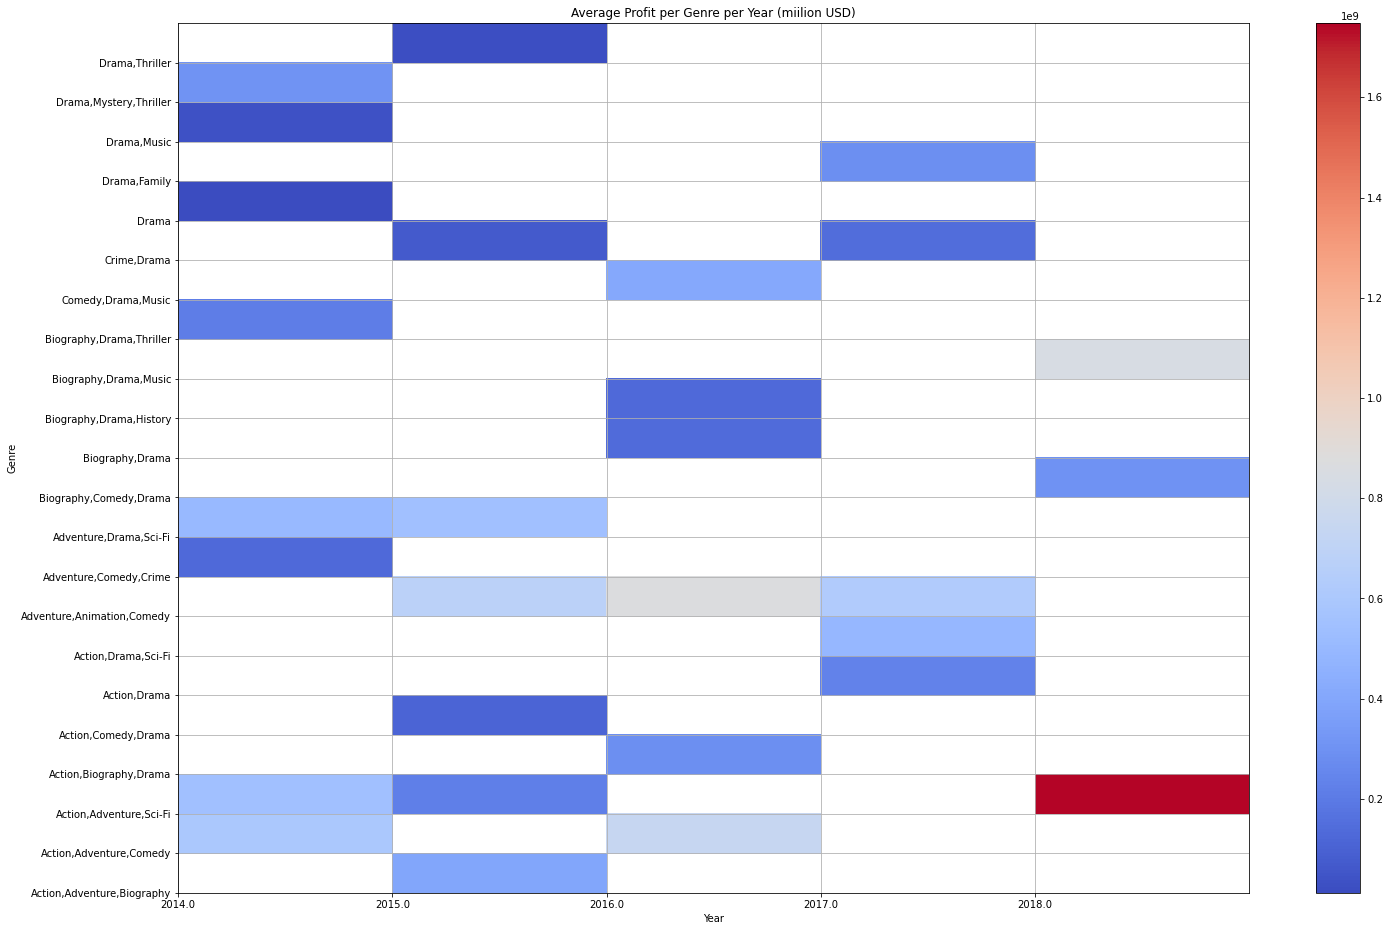

In [229]:
# Heatmap of Average Profit per Genre per Year
heatmap_data = success_filter.pivot_table(index='genres', columns='start_year', values='world_wide_profit', aggfunc='mean')
plt.figure(figsize=(24,16))
plt.pcolor(heatmap_data,cmap='coolwarm')
plt.colorbar()
plt.xlabel('Year')
plt.ylabel('Genre')
plt.title('Average Profit per Genre per Year (miilion USD)')
plt.yticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index)
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns)
plt.grid(True)
plt.show()

An analysis of the heatmap provides an understanding of how profits vary across genres and years. We can see by the bright red colour, the map points for the following grouped genres as profitable:

Actions, Adventure, Sci-fi

Action, Biography, Drama

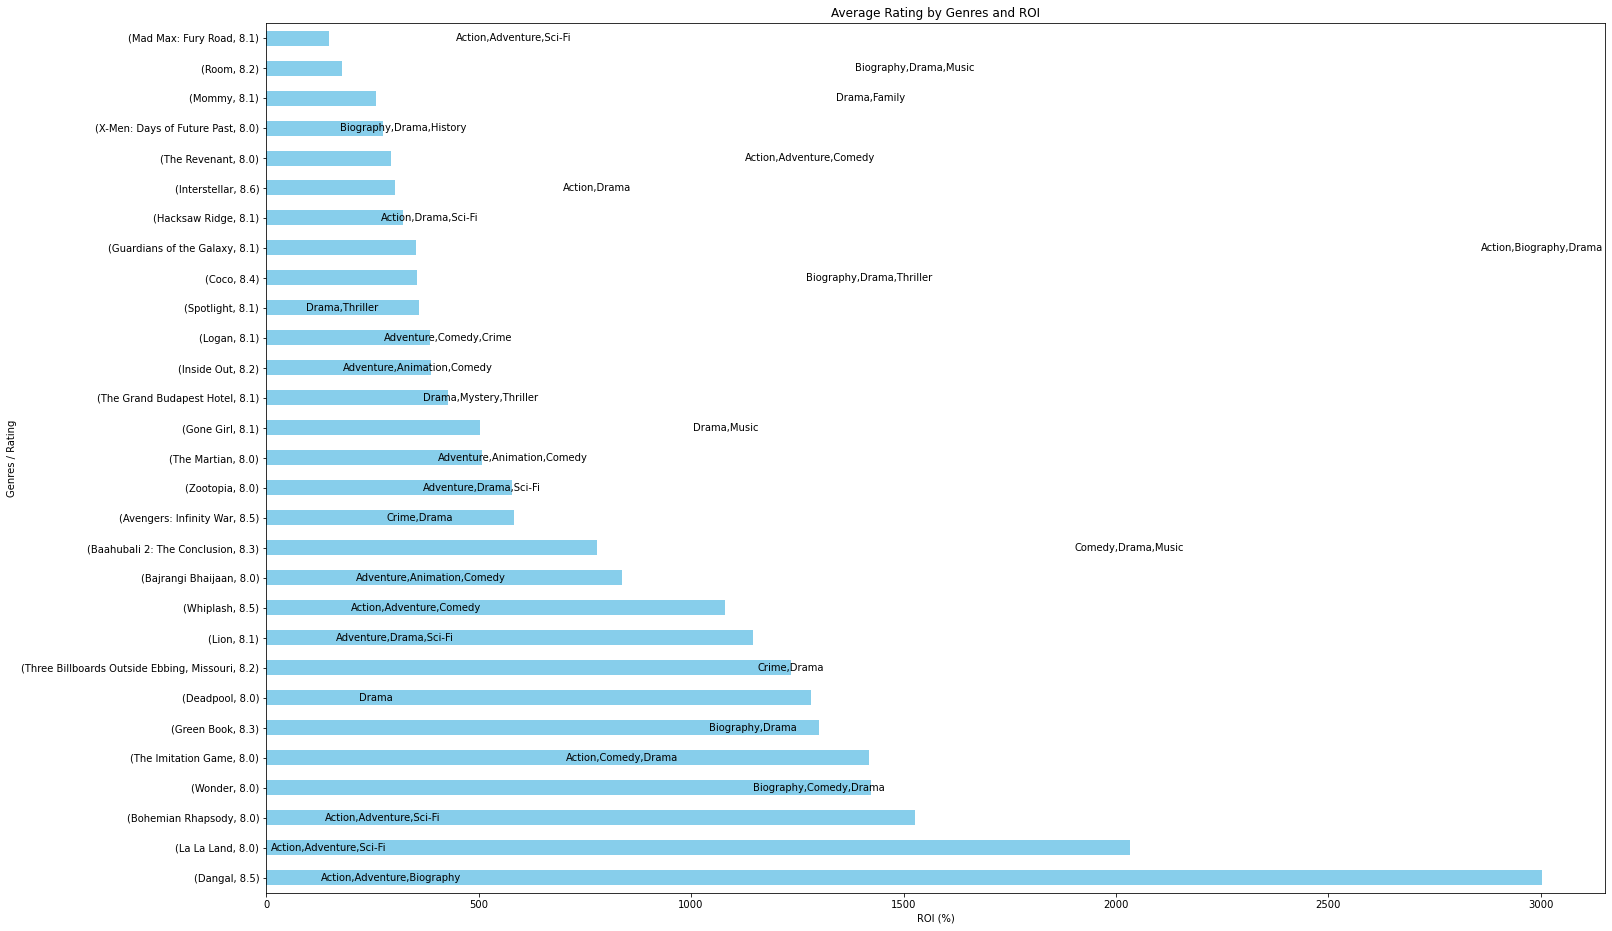

In [230]:
plt.figure(figsize=(24, 16))
success_filter.sort_values(by='ROI', ascending=False)['ROI'].plot(kind='barh', color='skyblue')
bar_plot = success_group.sum().sort_values(by='ROI', ascending=False)['ROI'].plot(kind='barh', color='skyblue')
plt.xlabel('ROI (%)')
plt.ylabel('Genres / Rating')
plt.title('Average Rating by Genres and ROI')
for i in range(len(success_filter)):
    bar_plot.text(success_filter['ROI'].iloc[i], i, success_filter['genres'].iloc[i], ha='center', va='center')

plt.show()

This visualization helps in quickly identifying which genres or ratings have higher or lower average ROI values, enabling easy interpretation of how different categories perform in those terms.
Movie names were added to this visualisation  for better understanding and research.
In this graphic, the 3 best performing grouped genres are:

Action, Adventure, Biography

Action, Adventure, Sci-Fi (x2)

Biography, Comedy, Drama

## Conclusions
After this analysis, we give three recommendations to Microsoft

 - **High Budget doesn't necessarily yeld high profit:** as our scatterplot graphic showed.
 - **Low ratings are not necessarily bad financially**: a movie can still be profitable even if the public doesn't score it highly. 
 - **Action, Adventure, Sci-Fi is trending:** as showed by all of our graphics, this grouped genre is trending up and it would be a good first forray into the movie production businees.
 - **Other genres:** Alternatively, Microsoft can look into the genres Biography, Comedy, Drama or Action, Adventure, Biography.

### Next Steps

- **Microsoft:** as a technology company with a huge portfolio, maybe Microsoft has a history to tell from its trajectory so far. Movies tell histories and writers need inspiration so the company can provide on that front.
- **Microsoft Games:** As the owner of the Xbox, it is also worth analysing the benefits of bringing one of its games to the movies.
- **Considerations:** More analysis of what comprises the budget, deeper understanding of competition and streaming licensing might give Microsoft even more tools to make better informed decisions.